Zajęcia polegały na rozwiązaniu problemu z mostkiem a mianowicie należało przy znanych spadkach napięć na rezystorach oraz przedziały prądów jakie mogą przepłynąć przez dany rezystor zminimalizować całkowitą moc wydzielaną na mostku. 

Jak wiadomo moc to iloczyn prądu i napięcia.

Funkcją jest suma mocy z danych rezystorów. 

Zmiennymi decyzyjnymi są prądy każdej z galęzi mostka.

Występujące ograniczenia to przedziały prądów płynących w danych gałęziach mostka.

Mostek:

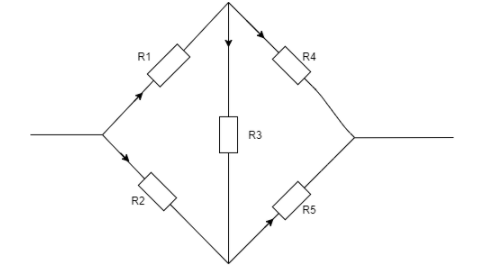

Dane:

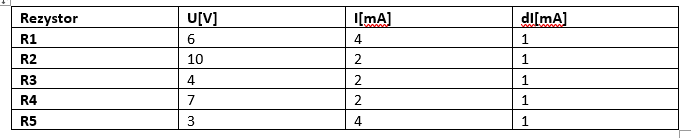



Standardowa instalacja pulpa

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

In [2]:
from pulp import *
import numpy as np

# Name and type of problem
prob = LpProblem("Minimalization problem of diffused power in resistor bridge",LpMinimize)

# The 5 variables of currents with limits.
i1=LpVariable("I1", 0.003, 0.005, LpContinuous)
i2=LpVariable("I2", 0.001, 0.003, LpContinuous)
i3=LpVariable("I3", 0.001, 0.003, LpContinuous)
i4=LpVariable("I4", 0.001, 0.003, LpContinuous)
i5=LpVariable("I5", 0.003, 0.005, LpContinuous)
 
# Constants of voltages
U = (6.0, 10.0, 4.0, 7.0, 3.0)

# The main function for total power in the circuit
prob += U[0]*i1 + U[1]*i2 + U[2]*i3 + U[3]*i4 + U[4]*i5, "Total Power"

# Constraints resulting from Kirchhoff's current law
prob += i1-i3 == i4, "KI1" 
prob += i2+i3 == i5, "KI2"

prob.writeLP("ResistorBridge.lp")

# The solution of problem
prob.solve()
print("Status of problem:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue, "A")
print()

# Sum of power loss on bridge
print("Power loss:", value(prob.objective), "W\n")  

# Resistance values ​​at which power losses are minimized:
for v, k in zip(U, prob.variables()):
  print("R",U.index(v)+1,"=",(v/k.varValue/1000),"k ohm")

Status of problem: Optimal
I1 = 0.003 A
I2 = 0.001 A
I3 = 0.002 A
I4 = 0.001 A
I5 = 0.003 A

Power loss: 0.052000000000000005 W

R 1 = 2.0 k ohm
R 2 = 10.0 k ohm
R 3 = 2.0 k ohm
R 4 = 7.0 k ohm
R 5 = 1.0 k ohm


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
